## Diamonds

In [ ]:
#Importing the Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the diamonds Dataset

In [5]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
# Check for the Shape of the Dataframe
df.shape

(53940, 10)

In [8]:
# Check for the datatype 
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [6]:
# Check for Null values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [10]:
# Knowing different type of cuts in the diamond
df.cut.unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [15]:
# Price of the diamond depending on the cut  
df.groupby('cut')['price'].mean().reset_index()

,cut,price
0,Ideal,3457.541970
1,Premium,4584.257704
2,Very Good,3981.759891
3,Good,3928.864452
4,Fair,4358.757764


In [18]:
# Average carat per cut
df.groupby('cut')['carat'].mean()

cut
Ideal        0.702837
Premium      0.891955
Very Good    0.806381
Good         0.849185
Fair         1.046137
Name: carat, dtype: float64

In [21]:
# Avg price grouped by both cut and color
df.groupby(['cut','color'])['price'].mean().unstack()

color,D,E,F,G,H,I,J
cut,,,,,,,
Ideal,2629.094566,2597.550090,3374.939362,3720.706388,3889.334831,4451.970377,4918.186384
Premium,3631.292576,3538.914420,4324.890176,4500.742134,5216.706780,5946.180672,6294.591584
Very Good,3470.467284,3214.652083,3778.820240,3872.753806,4535.390351,5255.879568,5103.513274
Good,3405.382175,3423.644159,3495.750275,4123.482204,4276.254986,5078.532567,4574.172638
Fair,4291.061350,3682.312500,3827.003205,4239.254777,5135.683168,4685.445714,4975.655462


In [22]:
# Check if better cuts have smaller tables
df.groupby('cut')[['table','depth']].mean()

,table,depth
cut,,
Ideal,55.951668,61.709401
Premium,58.746095,61.264673
Very Good,57.956150,61.818275
Good,58.694639,62.365879
Fair,59.053789,64.041677


In [23]:
# Top 5 most expensive diamonds
df.nlargest(5, 'price')

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat
27749,2.29,Premium,I,VS2,60.8,60.0,18823,8.50,8.47,5.16,8219.650655
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04,9409.000000
27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56,12454.304636
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11,9084.057971
27745,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01,9401.500000


In [24]:
# Price per carat
df['price_per_carat'] = df['price'] / df['carat']
df.sort_values('price_per_carat', ascending=False).head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat
27635,1.04,Very Good,D,IF,61.3,56.0,18542,6.53,6.55,4.01,17828.846154
27530,1.07,Premium,D,IF,60.9,58.0,18279,6.67,6.57,4.03,17083.177570
27226,1.03,Ideal,D,IF,62.0,56.0,17590,6.55,6.44,4.03,17077.669903
27457,1.07,Very Good,D,IF,60.9,58.0,18114,6.57,6.67,4.03,16928.971963
26998,1.02,Very Good,D,IF,61.7,59.0,17100,6.42,6.52,3.99,16764.705882


In [25]:
# Average price by cut and clarity
df.groupby(['cut','clarity'])['price'].mean().unstack()


clarity,IF,VVS1,VVS2,VS1,VS2,SI1,SI2,I1
cut,,,,,,,,
Ideal,2272.913366,2468.129458,3250.290100,3489.744497,3284.550385,3752.118169,4755.952656,4335.726027
Premium,3856.143478,2831.206169,3795.122989,4485.462041,4550.331248,4455.269371,5545.936928,3947.331707
Very Good,4396.216418,2459.441065,3037.765182,3805.353239,4215.759552,3932.391049,4988.688095,4078.226190
Good,4098.323944,2254.774194,3079.108392,3801.445988,4262.236196,3689.533333,4580.260870,3596.635417
Fair,1912.333333,3871.352941,3349.768116,4165.141176,4174.724138,4208.279412,5173.916309,3703.533333


In [29]:
# Mean price grouped by color
df.groupby('color')['price'].mean()


color
D    3169.954096
E    3076.752475
F    3724.886397
G    3999.135671
H    4486.669196
I    5091.874954
J    5323.818020
Name: price, dtype: float64

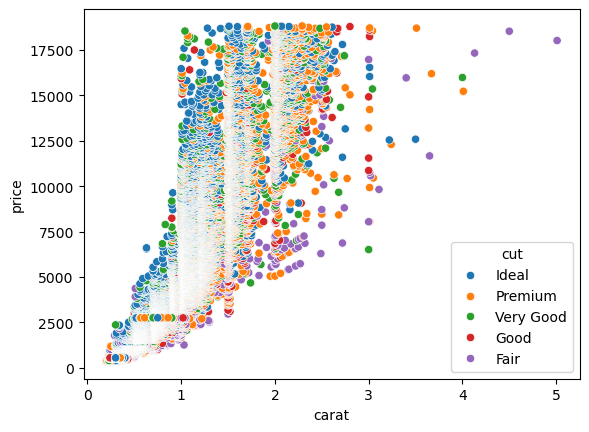

In [30]:
# Carat vs Price
sns.scatterplot(data=df, x='carat', y='price', hue='cut')
plt.show()

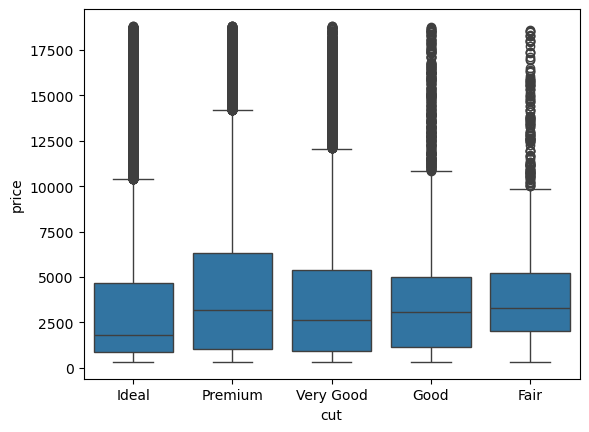

In [31]:
# Boxplot of price by cut
sns.boxplot(data=df, x='cut', y='price')
plt.show()